# Data Exploration

## Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import os
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

## Import Data

In [45]:
!pip install --quiet pyarrow

In [46]:
path = kagglehub.dataset_download(
    "martj42/international-football-results-from-1872-to-2017"
)
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'international-football-results-from-1872-to-2017' dataset.
Path to dataset files: /kaggle/input/international-football-results-from-1872-to-2017


In [47]:
results_path = os.path.join(path, "results.csv")
df = pd.read_csv(results_path, parse_dates=["date"])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Data Exploration

In [48]:
print("Shape:", df.shape)
display(df.head())
display(df.tail())
df.info()
display(df.describe(include="all"))

Shape: (48532, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
48527,2025-09-09,Bosnia and Herzegovina,Austria,1,2,FIFA World Cup qualification,Zenica,Bosnia and Herzegovina,False
48528,2025-09-09,Cyprus,Romania,2,2,FIFA World Cup qualification,Nicosia,Cyprus,False
48529,2025-09-09,Norway,Moldova,11,1,FIFA World Cup qualification,Oslo,Norway,False
48530,2025-09-09,Albania,Latvia,1,0,FIFA World Cup qualification,Tirana,Albania,False
48531,2025-09-09,Serbia,England,0,5,FIFA World Cup qualification,Belgrade,Serbia,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48532 entries, 0 to 48531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48532 non-null  datetime64[ns]
 1   home_team   48532 non-null  object        
 2   away_team   48532 non-null  object        
 3   home_score  48532 non-null  int64         
 4   away_score  48532 non-null  int64         
 5   tournament  48532 non-null  object        
 6   city        48532 non-null  object        
 7   country     48532 non-null  object        
 8   neutral     48532 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
count,48532,48532,48532,48532.000000,48532.000000,48532,48532,48532,48532
unique,NaN,325,318,NaN,NaN,188,2115,268,2
top,NaN,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False
freq,NaN,608,578,NaN,NaN,18116,736,1458,35751
mean,1993-10-17 04:11:45.579823488,NaN,NaN,1.758180,1.181550,NaN,NaN,NaN,NaN
min,1872-11-30 00:00:00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1980-02-27 00:00:00,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
50%,2000-03-15 00:00:00,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,2012-11-07 06:00:00,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN
max,2025-09-09 00:00:00,NaN,NaN,31.000000,21.000000,NaN,NaN,NaN,NaN


### Ununique and Null Values

In [49]:
print("Nulls per column:\n", df.isnull().sum())
print("\nUnique counts:\n", df.nunique())

Nulls per column:
 date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Unique counts:
 date          16348
home_team       325
away_team       318
home_score       26
away_score       22
tournament      188
city           2115
country         268
neutral           2
dtype: int64


### Data Distributions

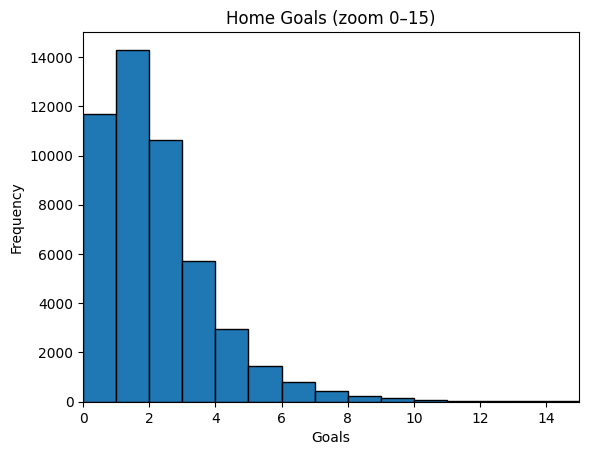

In [50]:
# Home goals (0–15)
ax = df["home_score"].plot.hist(bins=16, range=(0,16), edgecolor="black")
ax.set_title("Home Goals (zoom 0–15)")
ax.set_xlabel("Goals")
ax.set_xlim(0, 15)
plt.show()

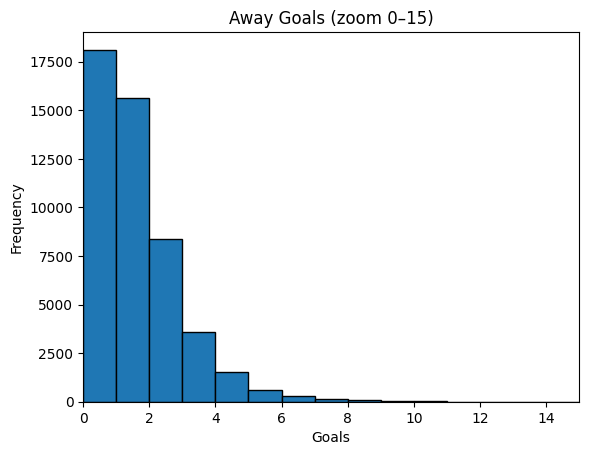

In [51]:
# Away goals (0–15)
ax = df["away_score"].plot.hist(bins=16, range=(0,16), edgecolor="black")
ax.set_title("Away Goals (zoom 0–15)")
ax.set_xlabel("Goals")
ax.set_xlim(0, 15)
plt.show()

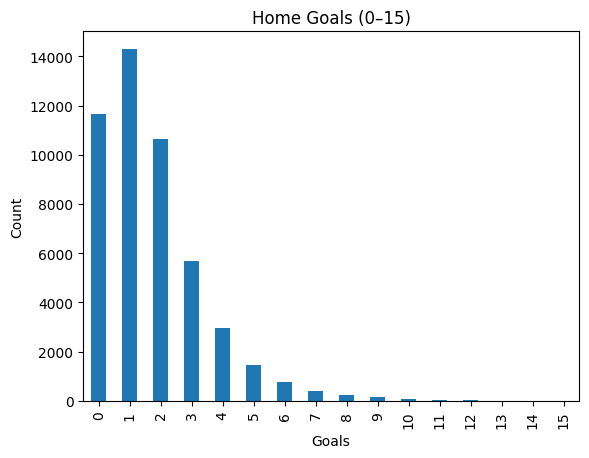

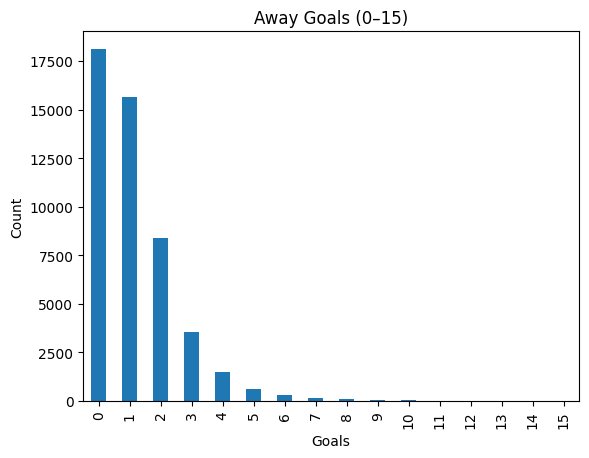

In [52]:
df["home_score"].value_counts().sort_index().loc[0:15].plot(kind="bar")
plt.title("Home Goals (0–15)")
plt.xlabel("Goals"); plt.ylabel("Count"); plt.show()

df["away_score"].value_counts().sort_index().loc[0:15].plot(kind="bar")
plt.title("Away Goals (0–15)")
plt.xlabel("Goals"); plt.ylabel("Count"); plt.show()

## Create Labels for Scoring at Home vs Scoring Away

In [53]:
df["result"] = np.where(df["home_score"] > df["away_score"], "Home Win",
                 np.where(df["home_score"] < df["away_score"], "Away Win", "Draw"))
df["goal_diff"] = df["home_score"] - df["away_score"]
df["year"] = df["date"].dt.year

result
Home Win    23797
Away Win    13700
Draw        11035
Name: count, dtype: int64


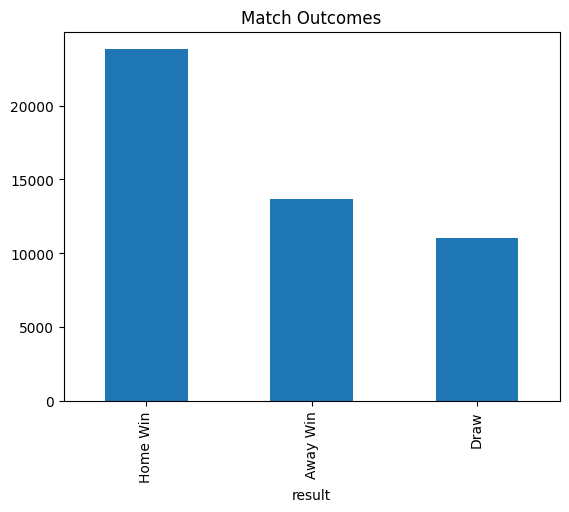

In [54]:
print(df["result"].value_counts())
df["result"].value_counts().plot(kind="bar", title="Match Outcomes"); plt.show()

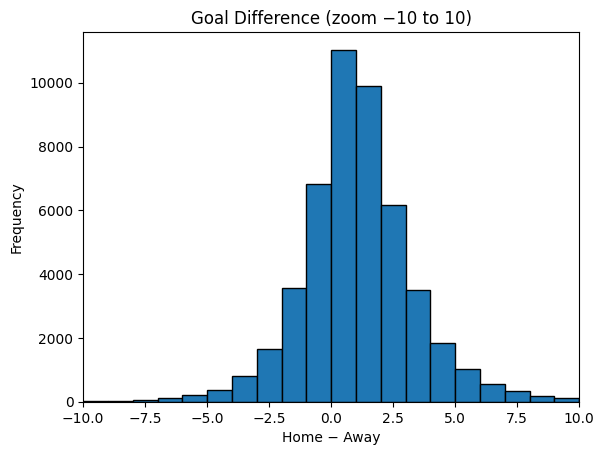

In [55]:
gd = df["home_score"] - df["away_score"]
ax = gd.plot.hist(bins=21, range=(-10,11), edgecolor="black")
ax.set_title("Goal Difference (zoom −10 to 10)")
ax.set_xlabel("Home − Away"); ax.set_xlim(-10, 10)
plt.show()

### Tren Graph Over Time

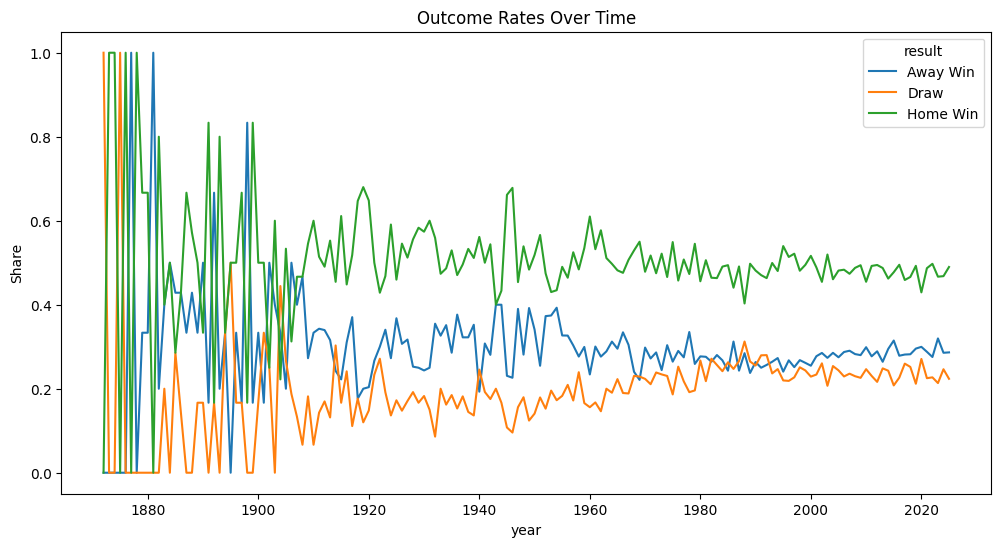

In [56]:
rate = (df.groupby("year")["result"].value_counts(normalize=True)
         .unstack().fillna(0.0))
rate.plot(kind="line", figsize=(12,6), title="Outcome Rates Over Time")
plt.ylabel("Share")
plt.show()

## Match Outcome Rates by Decade

result
Home Win    0.490
Away Win    0.282
Draw        0.227
Name: proportion, dtype: float64


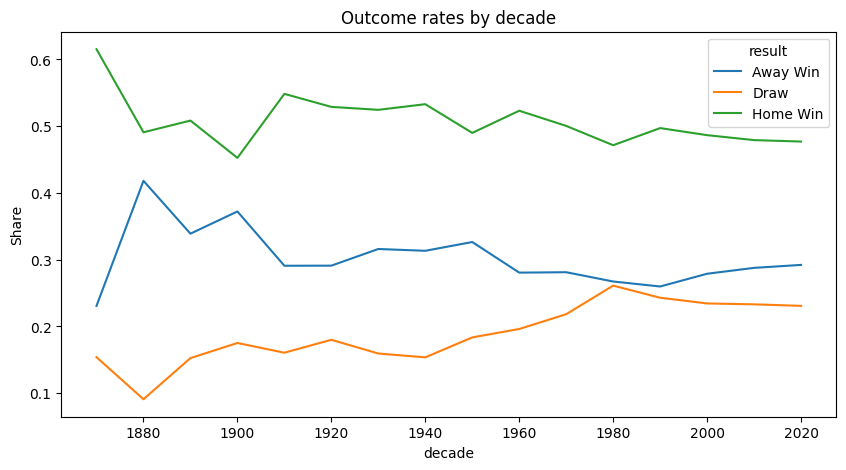

In [57]:
df["result"] = np.where(df.home_score>df.away_score,"Home Win",
                 np.where(df.home_score<df.away_score,"Away Win","Draw"))
df["decade"] = (df["date"].dt.year//10)*10

print(df["result"].value_counts(normalize=True).round(3))
df.groupby("decade")["result"].value_counts(normalize=True).unstack().plot(kind="line", title="Outcome rates by decade", figsize=(10,5))
plt.ylabel("Share"); plt.show()

### Results View by venue Country

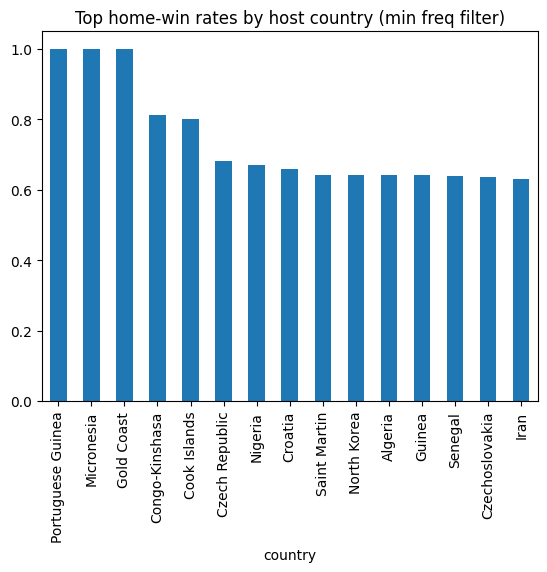

In [58]:
(df.assign(home_win=(df.home_score>df.away_score).astype(int))
   .groupby("country")["home_win"].mean()
   .sort_values(ascending=False).head(15)
   .plot(kind="bar", title="Top home-win rates by host country (min freq filter)"))
plt.show()

### Tournament/competition effect (friendlies vs qualifiers vs finals)

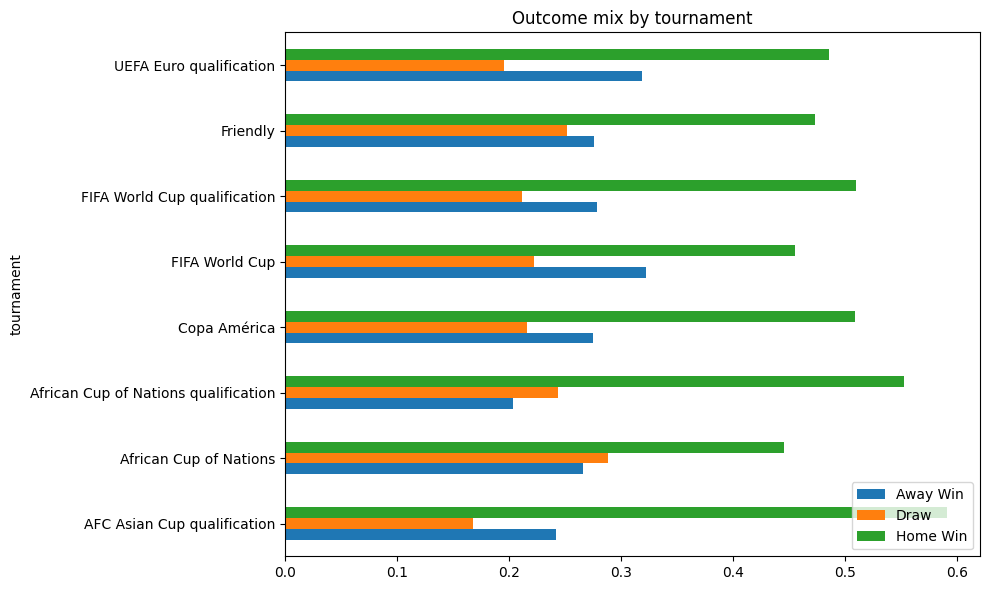

In [59]:
top_tourn = df["tournament"].value_counts().head(8).index
tmp = df[df["tournament"].isin(top_tourn)]
tmp.groupby("tournament")["result"].value_counts(normalize=True).unstack().plot(kind="barh", figsize=(10,6), title="Outcome mix by tournament")
plt.legend(loc="lower right"); plt.tight_layout(); plt.show()

### Leak Check

In [60]:
dupes = df.duplicated(subset=["date","home_team","away_team"], keep=False).sum()
print("Exact team/date duplicates:", dupes)

Exact team/date duplicates: 6


In [61]:
# Check for duplicates ( 6 rows with exact team and date)
# show all rows that collide on (date, home_team, away_team)
dups = (df[df.duplicated(subset=["date","home_team","away_team"], keep=False)]
          .sort_values(["date","home_team","away_team"]))
dups

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,goal_diff,year,decade
9472,1973-09-04,Singapore,Malaysia,0,0,Southeast Asian Peninsular Games,Singapore,Singapore,False,Draw,0,1973,1970
9474,1973-09-04,Singapore,Malaysia,0,3,Southeast Asian Peninsular Games,Singapore,Singapore,False,Away Win,-3,1973,1970
9637,1974-02-17,Tahiti,New Caledonia,2,1,Friendly,Papeete,Tahiti,False,Home Win,1,1974,1970
9638,1974-02-17,Tahiti,New Caledonia,1,2,Friendly,Papeete,Tahiti,False,Away Win,-1,1974,1970
11169,1977-10-22,Guyana,Barbados,2,0,Friendly,Linden,Guyana,False,Home Win,2,1977,1970
11170,1977-10-22,Guyana,Barbados,0,0,Friendly,Georgetown,Guyana,False,Draw,0,1977,1970


There appear to be at least three duplicate entries where the match dates and teams are the same but the recorded scores differ. It is very unlikely that these teams played separate matches on the exact same day. Based on external sources:

-Singapore vs Malaysia (September 1973): the correct score was 0–0.

-Tahiti vs New Caledonia (February 1974): the correct score was 2–1, a win for Tahiti.

-Guyana vs Barbados (October 1977): the result 2–0 in favor of Guyana is used.

In [62]:
# 1) Singapore vs Malaysia, Sept 4, 1973 -> keep 0-0 draw
df = df.drop(df[(df["date"] == "1973-09-04") &
                (df["home_team"] == "Singapore") &
                (df["away_team"] == "Malaysia") &
                (df["home_score"] == 0) &
                (df["away_score"] == 3)].index)

# 2) Tahiti vs New Caledonia, Feb 17, 1974 -> keep 2-1 Tahiti win
df = df.drop(df[(df["date"] == "1974-02-17") &
                (df["home_team"] == "Tahiti") &
                (df["away_team"] == "New Caledonia") &
                (df["home_score"] == 1) &
                (df["away_score"] == 2)].index)

# 3) Guyana vs Barbados, Oct 22, 1977 -> keep 2-0 Guyana win
df = df.drop(df[(df["date"] == "1977-10-22") &
                (df["home_team"] == "Guyana") &
                (df["away_team"] == "Barbados") &
                (df["home_score"] == 0) &
                (df["away_score"] == 0)].index)

print("Conflicting duplicates removed.")

Conflicting duplicates removed.


### Class Imbalance

In [63]:
base = df["result"].mode()[0]
print("Most common class baseline:", base,
      " | accuracy:", (df["result"]==base).mean().round(3))

# Slightly smarter baseline: "home win unless neutral"
pred = np.where(df["neutral"], "Draw", "Home Win")
print("Heuristic baseline accuracy:", (pred==df["result"]).mean().round(3))

Most common class baseline: Home Win  | accuracy: 0.49
Heuristic baseline accuracy: 0.433


### Number of Matches per Year

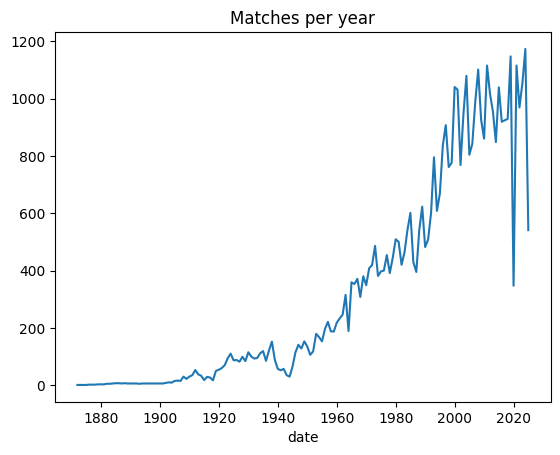

Years with very few matches: [1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1913, 1914, 1915, 1916, 1917, 1918, 1943, 1944]


In [64]:
matches_per_year = df.groupby(df["date"].dt.year).size()
matches_per_year.plot(kind="line", title="Matches per year"); plt.show()
print("Years with very few matches:", matches_per_year[matches_per_year<50].index.tolist())

The data seems to be pretty accurate. It shows that in 2020, the number of matches dropped substantially as this was affected by Covid-19.

# Data Cleaning

In [65]:
print("Data Shape", df.shape)
print("-------------------------")
print("First 5 Rows", df.head())
print("-------------------------")
print("Last 5 rows", df.tail())
print("-------------------------")
print("Data Information", df.info())
print("-------------------------")
print("Describe Table", df.describe())
print("-------------------------")
print("Unique Columns", df.nunique())

Data Shape (48529, 13)
-------------------------
First 5 Rows         date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral    result  goal_diff  year  decade  
0  Scotland    False      Draw          0  1872    1870  
1   England    False  Home Win          2  1873    1870  
2  Scotland    False  Home Win          1  1874    1870  
3   England    False      Draw          0  1875    1870  
4  Scotland    False  Home Win          3  1876    1870  
-------------------------
Last 5 rows             date               home_team away_team  home_score  away_sc

### Check for Missing Values

In [66]:
print("Null values", df.isnull().sum())
print("Duplicate values", df.duplicated().sum())

Null values date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
result        0
goal_diff     0
year          0
decade        0
dtype: int64
Duplicate values 0


### Check for Dupliates

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
key_cols = ["date","home_team","away_team","home_score","away_score",
            "tournament","city","country","neutral"]
# How many exact dup rows?
print(df.duplicated(subset=key_cols).sum())

0


### Check for Team Swapped

In [69]:
tmp = df.copy()
tmp["team_pair"] = tmp.apply(lambda r: tuple(sorted([r["home_team"], r["away_team"]])), axis=1)

# same date & team_pair appearing >1 times (could be legitimate—e.g., tournaments—or duplicates)
pair_dups = (tmp.groupby(["date","team_pair"])
               .size().reset_index(name="cnt")
               .query("cnt > 1"))

tmp.merge(pair_dups, on=["date","team_pair"], how="inner").sort_values(["date","team_pair"])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,goal_diff,year,decade,team_pair,cnt
0,1916-08-15,Argentina,Uruguay,3,1,Copa Newton,Avellaneda,Argentina,False,Home Win,2,1916,1910,"(Argentina, Uruguay)",2
1,1916-08-15,Uruguay,Argentina,1,2,Copa Lipton,Montevideo,Uruguay,False,Away Win,-1,1916,1910,"(Argentina, Uruguay)",2
2,1916-10-01,Argentina,Uruguay,7,2,Friendly,Avellaneda,Argentina,False,Home Win,5,1916,1910,"(Argentina, Uruguay)",2
3,1916-10-01,Uruguay,Argentina,0,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,Away Win,-1,1916,1910,"(Argentina, Uruguay)",2
4,1921-05-30,Japan,Philippines,0,3,Friendly,Shanghai,China PR,True,Away Win,-3,1921,1920,"(Japan, Philippines)",2
5,1921-05-30,Philippines,Japan,3,1,Far Eastern Championship Games,Shanghai,China PR,True,Home Win,2,1921,1920,"(Japan, Philippines)",2
6,1924-05-25,Argentina,Uruguay,4,0,Copa Newton,Buenos Aires,Argentina,False,Home Win,4,1924,1920,"(Argentina, Uruguay)",2
7,1924-05-25,Uruguay,Argentina,2,0,Copa Lipton,Montevideo,Uruguay,False,Home Win,2,1924,1920,"(Argentina, Uruguay)",2
8,1925-05-20,China PR,Japan,2,0,Friendly,Manila,Philippines,True,Home Win,2,1925,1920,"(China PR, Japan)",2
9,1925-05-20,Japan,China PR,0,2,Far Eastern Championship Games,Manila,Philippines,True,Away Win,-2,1925,1920,"(China PR, Japan)",2


In [70]:
tmp = df.copy()
tmp["team_pair"] = tmp.apply(lambda r: tuple(sorted([r["home_team"], r["away_team"]])), axis=1)

# same date & team_pair appearing >1 times (could be legitimate—e.g., tournaments—or duplicates)
pair_dups = (tmp.groupby(["date","team_pair"])
               .size().reset_index(name="cnt")
               .query("cnt > 1"))

tmp.merge(pair_dups, on=["date","team_pair"], how="inner").sort_values(["date","team_pair"])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,goal_diff,year,decade,team_pair,cnt
0,1916-08-15,Argentina,Uruguay,3,1,Copa Newton,Avellaneda,Argentina,False,Home Win,2,1916,1910,"(Argentina, Uruguay)",2
1,1916-08-15,Uruguay,Argentina,1,2,Copa Lipton,Montevideo,Uruguay,False,Away Win,-1,1916,1910,"(Argentina, Uruguay)",2
2,1916-10-01,Argentina,Uruguay,7,2,Friendly,Avellaneda,Argentina,False,Home Win,5,1916,1910,"(Argentina, Uruguay)",2
3,1916-10-01,Uruguay,Argentina,0,1,Copa Premio Honor Uruguayo,Montevideo,Uruguay,False,Away Win,-1,1916,1910,"(Argentina, Uruguay)",2
4,1921-05-30,Japan,Philippines,0,3,Friendly,Shanghai,China PR,True,Away Win,-3,1921,1920,"(Japan, Philippines)",2
5,1921-05-30,Philippines,Japan,3,1,Far Eastern Championship Games,Shanghai,China PR,True,Home Win,2,1921,1920,"(Japan, Philippines)",2
6,1924-05-25,Argentina,Uruguay,4,0,Copa Newton,Buenos Aires,Argentina,False,Home Win,4,1924,1920,"(Argentina, Uruguay)",2
7,1924-05-25,Uruguay,Argentina,2,0,Copa Lipton,Montevideo,Uruguay,False,Home Win,2,1924,1920,"(Argentina, Uruguay)",2
8,1925-05-20,China PR,Japan,2,0,Friendly,Manila,Philippines,True,Home Win,2,1925,1920,"(China PR, Japan)",2
9,1925-05-20,Japan,China PR,0,2,Far Eastern Championship Games,Manila,Philippines,True,Away Win,-2,1925,1920,"(China PR, Japan)",2


There is no swap teams with exact the same scores and date.

### Standardize Team names

In [71]:
teams = pd.concat([df['home_team'], df['away_team']]).unique()
sorted(teams)

['Abkhazia',
 'Afghanistan',
 'Albania',
 'Alderney',
 'Algeria',
 'Ambazonia',
 'American Samoa',
 'Andalusia',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Arameans Suryoye',
 'Argentina',
 'Armenia',
 'Artsakh',
 'Aruba',
 'Asturias',
 'Australia',
 'Austria',
 'Aymara',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barawa',
 'Barbados',
 'Basque Country',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Biafra',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brittany',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canary Islands',
 'Cape Verde',
 'Cascadia',
 'Catalonia',
 'Cayman Islands',
 'Central African Republic',
 'Central Spain',
 'Chad',
 'Chagos Islands',
 'Chameria',
 'Chechnya',
 'Chile',
 'China PR',
 'Cilento',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Corsica',
 'Costa Rica',
 'County of Nice',
 'Crimea',
 '

In some cases, there are multiple historical names for the same country. Since the goal of this project is to predict the outcomes of future games, these duplicates will be consolidated and matched to their modern successors.

In [72]:
# Canonical aliases (spelling/alias normalization)
ALIAS = {
    "Korea Republic": "South Korea",
    "Korea, South": "South Korea",
    "Korea DPR": "North Korea",
    "Korea, North": "North Korea",
    "China PR": "China",
    "Côte d'Ivoire": "Ivory Coast",
    "Cabo Verde": "Cape Verde",
    "Swaziland": "Eswatini",
    "Zaire": "DR Congo",
    "Burma": "Myanmar",
    "Macedonia": "North Macedonia",
    "Iran IR": "Iran",
    "Republic of Ireland": "Republic of Ireland",
    "Ireland": "Republic of Ireland",
    "United States of America": "United States",
    "Soviet Union": "Soviet Union",
    "Czechoslovakia": "Czechoslovakia",
    "West Germany": "Germany",
    "FR Germany": "Germany",
    "German DR": "East Germany",
    "Yugoslavia": "Yugoslavia",
    "Serbia and Montenegro": "Serbia and Montenegro",
    "Netherlands Antilles": "Netherlands Antilles",
}

def canonicalize(name: str) -> str:
    return ALIAS.get(name, name)

In [73]:
SUCCESSOR = {
    "West Germany": "Germany",
    "East Germany": "Germany",
    "Soviet Union": "Russia",
    "Czechoslovakia": "Czech Republic",
    "Yugoslavia": "Serbia",
    "Serbia and Montenegro": "Serbia",
    "Vietnam Republic": "Vietnam",
    "North Vietnam": "Vietnam",
    "Yemen DPR": "Yemen",
    "Netherlands Antilles": "Curaçao",
}

def apply_successor(name: str) -> str:
    return SUCCESSOR.get(name, name)

In [74]:
for col in ["home_team", "away_team"]:
    df[col] = df[col].map(canonicalize).map(apply_successor)

In [75]:
wc_mask = df["tournament"].str.contains("FIFA World Cup", case=False, na=False)

# Teams that appear in WC finals
wc_teams = set(pd.concat([df.loc[wc_mask, "home_team"], df.loc[wc_mask, "away_team"]]).dropna().unique())

# Filter dataset to matches between WC-capable teams
df_clean = df[(df["home_team"].isin(wc_teams)) & (df["away_team"].isin(wc_teams))].copy()

For the purpose of building a model that predicts which team will win in the world cup, teams that are not qualified for World up qualifiers/finals will be removed.

In [76]:
# Teams that would be dropped by the filter
all_teams = set(pd.concat([df_clean["home_team"], df_clean["away_team"]]).dropna().unique())
dropped = sorted(all_teams - wc_teams)
print("Teams excluded (non-WC participants or regional selections):", dropped[:40], "… total:", len(dropped))

Teams excluded (non-WC participants or regional selections): [] … total: 0


In [77]:
# Create a new dataframe that contains only the teams qualified for WC
df_world_cup = df_clean[
    (df_clean["home_team"].isin(wc_teams)) &
    (df_clean["away_team"].isin(wc_teams))
].copy()

In [78]:
df_world_cup['home_team'].value_counts().head(10)

,count
home_team,
Germany,682
Brazil,608
Argentina,598
Mexico,582
England,544
South Korea,542
France,532
Sweden,529
Hungary,493


In [79]:
df_world_cup['away_team'].value_counts().head(10)

,count
away_team,
Germany,639
Uruguay,574
Sweden,564
England,538
Hungary,504
Serbia,497
Paraguay,485
Czech Republic,458
Argentina,458


## Create Columns for Result, Winning Type and Year

This is to save time and memmories for training later since object type usually uses up more memory.

In [80]:
df_world_cup["result"] = df_world_cup.apply(
    lambda x: "Home Win" if x.home_score > x.away_score
              else "Away Win" if x.home_score < x.away_score
              else "Draw", axis=1
)
df_world_cup["goal_diff"] = df_world_cup["home_score"] - df_world_cup["away_score"]
df_world_cup["year"] = df_world_cup["date"].dt.year
df_world_cup

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,goal_diff,year,decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0,1872,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Home Win,2,1873,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Home Win,1,1874,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0,1875,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Home Win,3,1876,1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48527,2025-09-09,Bosnia and Herzegovina,Austria,1,2,FIFA World Cup qualification,Zenica,Bosnia and Herzegovina,False,Away Win,-1,2025,2020
48528,2025-09-09,Cyprus,Romania,2,2,FIFA World Cup qualification,Nicosia,Cyprus,False,Draw,0,2025,2020
48529,2025-09-09,Norway,Moldova,11,1,FIFA World Cup qualification,Oslo,Norway,False,Home Win,10,2025,2020
48530,2025-09-09,Albania,Latvia,1,0,FIFA World Cup qualification,Tirana,Albania,False,Home Win,1,2025,2020
